## Problem 2 [Variance Reduction Methods for Monte Carlo]
Use a total sample budget of $n=1000$ to obtain Monte Carlo estimates and sample MC estimate variances for the definite integrals in 2 dimensions $(x_1, x_2)$:  
$$
(a)\ exp(\sum _{i=1} ^2 5| x_i - 0.5|)\ \ \ for\ x_i\ in\ [0,1] \\ 
(b)\ cos(\pi + \sum _{i=1} ^2 5x_i)\ \ \ for\ x_i\ in\ [-1,1] \\
(c)\ |4x-2| \times |4y-2|\ \ \ for \ x,y \ in \ [0,1]
$$
Implement stratification and importance sampling (separately) in the Monte Carlo estimation procedures using the same sample budget $n=1000$. Compare the 3 different Monte Carlo integral estimates and their sample variances. Discuss the quality of the Monte Carlo estimates from each method.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
SAMPLE_BUDGET = 1000
SAMPLE_TIME = 100

In [2]:
def rv_gen(my_pdf,maxvalue):
    rv_list = []
    i = 0
    while i < SAMPLE_BUDGET:
        rp = np.array([np.random.rand(),np.random.rand()]).T
        if my_pdf(rp)/2 > np.random.rand():
            i = i + 1
            rv_list.append(rp)
    return rv_list

**(a)** Firstly, we calculate the general MC for (a). Next, we use startified and importance sampling separately to reduce the variance. 

In [3]:
def my_func1(x):
    if min(x) < 0 or max(x) > 1:
        return 0
    return np.exp(np.sum(5*np.abs(x - 0.5)))

We run the MC method for 100 times to get the average mean and variance.

In [4]:
a_general_mean_list = []
a_general_var_list = []
for i in range(SAMPLE_TIME):
    x = np.random.rand(SAMPLE_BUDGET,2)
    y = map(lambda t: my_func1(t),x)
    a_general_mean_list.append(np.average(y))
    a_general_var_list.append(np.var(y,ddof = 1))

The general MC result for (a) is

In [5]:
np.average(a_general_mean_list)

20.052755610199473

The sample variance is

In [6]:
np.mean(a_general_var_list)

466.67150655259263

For stratification sampling, we divide the integral area into 2 subinterval as showing below.

<IPython.core.display.Javascript object>


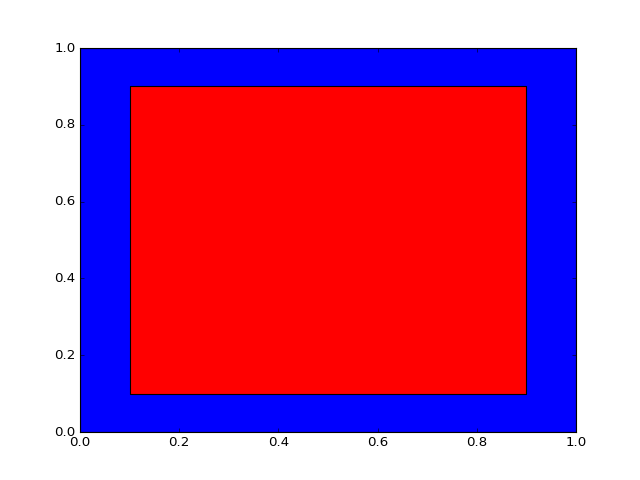

In [7]:
T = 0.4
plt.figure()
plt.fill_between([0,1],[0,0],[1,1],facecolor = 'blue')
plt.fill_between([0.5 - T,0.5 + T],[0.5 - T,0.5 - T],[0.5 + T,0.5 + T],facecolor = 'red')
plt.show()

The following figure shows the random number that we used to sample the function.

<IPython.core.display.Javascript object>


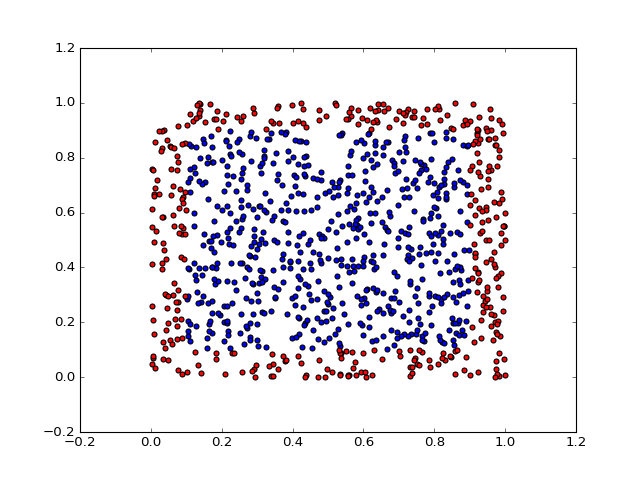

In [8]:
x = np.random.rand(SAMPLE_BUDGET,2)
x1_index = np.logical_and(np.abs(x[:,0] -0.5) < T, np.abs(x[:,1] -0.5) < T)
x1 = x[x1_index]
x2 = x[np.logical_not(x1_index)]
plt.figure()
plt.scatter(x1[:,0],x1[:,1])
plt.hold(True)
plt.scatter(x2[:,0],x2[:,1],c='r')
plt.show()

Calculate the mean and variance in each stratified area. Then, we combine them to get the result for the whole area.

In [9]:
a_strat_mean_list = []
a_strat_var_list = []
for i in range(SAMPLE_TIME):
        
        # Gen random number
        x = np.random.rand(SAMPLE_BUDGET,2)
        x1_index = np.logical_and(np.abs(x[:,0] -0.5) < T, np.abs(x[:,1] -0.5) < T)
        x1 = x[x1_index]
        x2 = x[np.logical_not(x1_index)]
        p = float(sum(x1_index))/SAMPLE_BUDGET
        
        # Gen samples
        y1 = map(lambda t: my_func1(t), x1)
        y2 = map(lambda t: my_func1(t), x2)

        # Get mean for each subinterval
        m1 = np.average(y1)
        m2 = np.average(y2)
        
        # Get var for each subinterval
        v1 = np.var(y1,ddof=1)
        v2 = np.var(y2,ddof=1)
        a_strat_mean_list.append(m1*p+m2*(1-p))
        a_strat_var_list.append(v1*p+v2*(1-p))

The result of stratified sampling is

In [10]:
np.average(a_strat_mean_list)

20.003338503949848

The average variance of stratified sampling is 

In [11]:
np.average(a_strat_var_list)

295.59743287351461

We choose  $f_{X_1X_2}(x_1,x_2) = 2 \left| x_1 - 0.5 \right| +2\left| x_2 - 0.5 \right| $  ,  ($x_1,x_2 \in [0,1]$) for the importance sampling of (a). Since it is close to the function in (a).

In [12]:
def my_pdf1(x):
    if min(x) < 0 or max(x) > 1:
        return 0
    return np.sum(np.abs(x-0.5))*2

In [13]:
a_imp_mean_list=[]
a_imp_var_list=[]
for i in range(SAMPLE_TIME):
    x = np.array(rv_gen(my_pdf1,2))
    y = map(lambda t: my_func1(t)/my_pdf1(t),x)
    a_imp_mean_list.append(np.average(y))
    a_imp_var_list.append(np.var(y,ddof = 1))

The importance sampling result for (a) is

In [14]:
np.average(a_imp_mean_list)

19.983525784911119

The sample variance is

In [15]:
np.average(a_imp_var_list)

157.90499535069128

**(b)** Let's work for (b). Firstly, we calculate the general MC result.

In [16]:
def my_func2(x):
    if min(x) < -1 or max(x) > 1:
        return 0
    return np.cos(np.pi+5*np.sum(x))

In [17]:
b_general_mean_list = []
b_general_var_list = []
for i in range(SAMPLE_TIME):
    x = np.random.rand(SAMPLE_BUDGET,2)*2 -1
    y = map(lambda t: my_func2(t),x)
    b_general_mean_list.append(np.average(y)) 
    b_general_var_list.append(np.var(y,ddof = 1))

The general result for (b) is

In [18]:
np.average(b_general_mean_list)

-0.036134399756541813

The sample variance is

In [19]:
np.average(b_general_var_list)

0.50064418200357419

For stratified sampling, we divide the area in to 2 subarea. The first area is where the function greater than 0. The rest will be the second area.

<IPython.core.display.Javascript object>


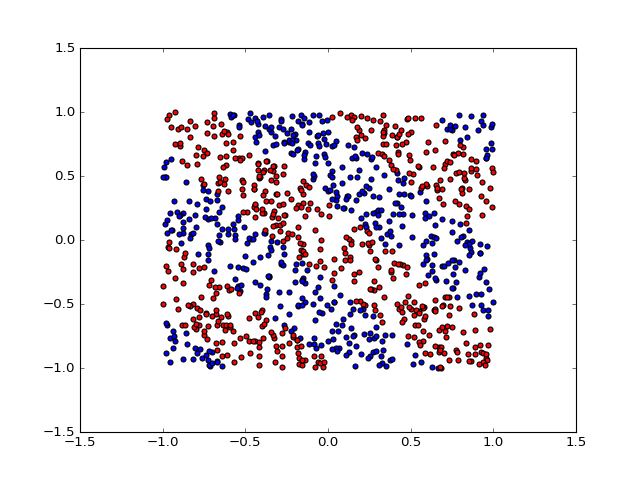

In [20]:
x = np.random.rand(SAMPLE_BUDGET,2)*2 - 1
x1_index = np.array(map(lambda t: my_func2(t) > 0, x))
x1 = x[x1_index]
x2 = x[np.logical_not(x1_index)]
plt.figure()
plt.scatter(x1[:,0],x1[:,1])
plt.hold(True)
plt.scatter(x2[:,0],x2[:,1],c='r')
plt.show()

In [21]:
b_strat_mean_list = []
b_strat_var_list = []
for i in range(SAMPLE_TIME):
        
        # Gen random number
        x = np.random.rand(SAMPLE_BUDGET,2)*2 - 1
        x1_index = np.array(map(lambda t: my_func2(t) > 0, x))
        x1 = x[x1_index]
        x2 = x[np.logical_not(x1_index)]
        p = float(sum(x1_index))/SAMPLE_BUDGET
        
        # Gen samples
        y1 = map(lambda t: my_func2(t), x1)
        y2 = map(lambda t: my_func2(t), x2)

        # Get mean for each subinterval
        m1 = np.average(y1)
        m2 = np.average(y2)
        
        # Get var for each subinterval
        v1 = np.var(y1,ddof=1)
        v2 = np.var(y2,ddof=1)
        b_strat_mean_list.append(m1*p+m2*(1-p))
        b_strat_var_list.append(v1*p+v2*(1-p))

The stratified sampling MC result for (b) is 

In [22]:
np.mean(b_strat_mean_list)

-0.038312604220367107

The variance of the stratified sampling is

In [23]:
np.mean(b_strat_var_list)

0.093852671639760549

For this function, it is hard to find a good pdf that is approximately proportional to it. We choose the $f(x_1,x_2)=\frac{0.5+0.5*cos(10x_1+10x_2)}{2+\frac{1-cos(20)}{200}}$ for the importance sampling.

In [24]:
def my_pdf2(x):
    if min(x) < -1 or max(x) > 1:
        return 0
    return (0.5+0.5*np.cos(10*sum(x)))/(2+(1-np.cos(20)/200))

In [25]:
b_imp_mean_list=[]
b_imp_var_list = []
for i in range(SAMPLE_TIME):
    x = np.array(rv_gen(my_pdf2,1/(2+(1-np.cos(20)/200))))
    y = map(lambda t: my_func2(t)/my_pdf2(t), x)
    b_imp_mean_list.append(np.average(y))
    b_imp_var_list.append(np.var(y,ddof = 1))

The importance sampling result for (b) is

In [26]:
np.average(b_imp_mean_list)

-0.099095916789785521

The sample variance is

In [27]:
np.mean(b_imp_var_list)

18.762760618255072

**(c)** Again, we firstly calculate the general MC.

In [28]:
def my_func3(x):
    if min(x) < 0 or max(x) > 1:
        return 0
    return np.abs(4*x[0] - 2) * np.abs(4*x[1] - 2)

In [29]:
c_general_mean_list = []
c_general_var_list = []
for i in range(SAMPLE_TIME):
    x = np.random.rand(SAMPLE_BUDGET,2)
    y = map(lambda t: my_func3(t),x)
    c_general_mean_list.append(np.average(y)) 
    c_general_var_list.append(np.var(y,ddof = 1))

The general result for (c) is

In [30]:
np.average(c_general_mean_list)

1.0012094727702212

The sample variance is

In [31]:
np.average(c_general_var_list)

0.78079376815897872

We use the same stratifing schedule in **(a)**.

In [32]:
c_strat_mean_list = []
c_strat_var_list = []
for i in range(SAMPLE_TIME):
        
        # Gen random number
        x = np.random.rand(SAMPLE_BUDGET,2)
        x1_index = np.logical_and(np.abs(x[:,0] -0.5) < T, np.abs(x[:,1] -0.5) < T)
        x1 = x[x1_index]
        x2 = x[np.logical_not(x1_index)]
        p = float(sum(x1_index))/SAMPLE_BUDGET
        
        # Gen samples
        y1 = map(lambda t: my_func3(t), x1)
        y2 = map(lambda t: my_func3(t), x2)

        # Get mean for each subinterval
        m1 = np.average(y1)
        m2 = np.average(y2)
        
        # Get var for each subinterval
        v1 = np.var(y1,ddof=1)
        v2 = np.var(y2,ddof=1)
        c_strat_mean_list.append(m1*p+m2*(1-p))
        c_strat_var_list.append(v1*p+v2*(1-p))

The stratified sampling result for **(c)** is 

In [33]:
np.mean(c_strat_mean_list)

1.0015877410066267

The variance of (c) for stratified sampling is

In [34]:
np.mean(c_strat_var_list)

0.54462014020910277

We choose $f(x_1,x_2) = 4\left| x_1-0.5 \right| $ for the importance sampling.

In [35]:
def my_pdf3(x):
    if min(x) < 0 or max(x) > 1:
        return 0
    return 4 * np.abs(x[0]-0.5)

In [36]:
c_imp_mean_list=[]
c_imp_var_list=[]
for i in range(SAMPLE_TIME):
    x = np.array(rv_gen(my_pdf3,2))
    y = map(lambda t: my_func3(t)/my_pdf3(t),x)
    zx = np.logical_or(x < 0,x > 1)
    zy = np.logical_or(zx[:,0],zx[:,1])
    y = y*np.logical_not(zy)
    c_imp_mean_list.append(np.average(y))
    c_imp_var_list.append(np.var(y,ddof = 1))

The importance sampling result for (c) is

In [37]:
np.average(c_imp_mean_list)

0.99944498940620941

The sample variance is

In [38]:
np.mean(c_imp_var_list)

0.33253082953782692

In [39]:
print("(%c) general mean: %.4f \t stratified mean: %.4f \t importance mean: %.4f"%('a',np.mean(a_general_mean_list),np.mean(a_strat_mean_list),np.mean(a_imp_mean_list)))
print("(%c) general mean: %.4f \t stratified mean: %.4f \t importance mean: %.4f"%('b',np.mean(b_general_mean_list),np.mean(b_strat_mean_list),np.mean(b_imp_mean_list)))
print("(%c) general mean: %.4f \t stratified mean: %.4f \t importance mean: %.4f"%('c',np.mean(c_general_mean_list),np.mean(c_strat_mean_list),np.mean(c_imp_mean_list)))

(a) general mean: 20.0528 	 stratified mean: 20.0033 	 importance mean: 19.9835
(b) general mean: -0.0361 	 stratified mean: -0.0383 	 importance mean: -0.0991
(c) general mean: 1.0012 	 stratified mean: 1.0016 	 importance mean: 0.9994


In [40]:
print("(%c) general var: %.4f \t stratified var: %.4f \t importance var: %.4f"%('a',np.mean(a_general_var_list),np.mean(a_strat_var_list),np.mean(a_imp_var_list)))
print("(%c) general var: %.4f \t stratified var: %.4f \t importance var: %.4f"%('b',np.mean(b_general_var_list),np.mean(b_strat_var_list),np.mean(b_imp_var_list)))
print("(%c) general var: %.4f \t stratified var: %.4f \t importance var: %.4f"%('c',np.mean(c_general_var_list),np.mean(c_strat_var_list),np.mean(c_imp_var_list)))

(a) general var: 466.6715 	 stratified var: 295.5974 	 importance var: 157.9050
(b) general var: 0.5006 	 stratified var: 0.0939 	 importance var: 18.7628
(c) general var: 0.7808 	 stratified var: 0.5446 	 importance var: 0.3325


From (a) and (c), we can see that both method reduce the variance. The importance sampling is better than the stratified sampling. However, it is hard to find a pdf for (b) that approximately proportional to the function. In this case, the importance sampling may not as good as stratified sampling.